In [1]:
import random
import math
import matplotlib.pyplot as plt


Generation 1, Best Fitness: 59.757151680338346
Generation 2, Best Fitness: 256.7881702258659
Generation 3, Best Fitness: 360.1565359772966
Generation 4, Best Fitness: 541.8044075874269
Generation 5, Best Fitness: 541.8044075874269
Generation 6, Best Fitness: 1818.0892502017814
Generation 7, Best Fitness: 1818.0892502017814
Generation 8, Best Fitness: 1818.0892502017814
Generation 9, Best Fitness: 65409.220366243164
Generation 10, Best Fitness: 65409.220366243164
Generation 11, Best Fitness: 65409.220366243164
Generation 12, Best Fitness: 65409.220366243164
Generation 13, Best Fitness: 65409.220366243164
Generation 14, Best Fitness: 65409.220366243164
Generation 15, Best Fitness: 65409.220366243164
Generation 16, Best Fitness: 65409.220366243164
Generation 17, Best Fitness: 65409.220366243164
Generation 18, Best Fitness: 65409.220366243164
Generation 19, Best Fitness: 65409.220366243164
Generation 20, Best Fitness: 65409.220366243164
Generation 21, Best Fitness: 65409.220366243164
Gener

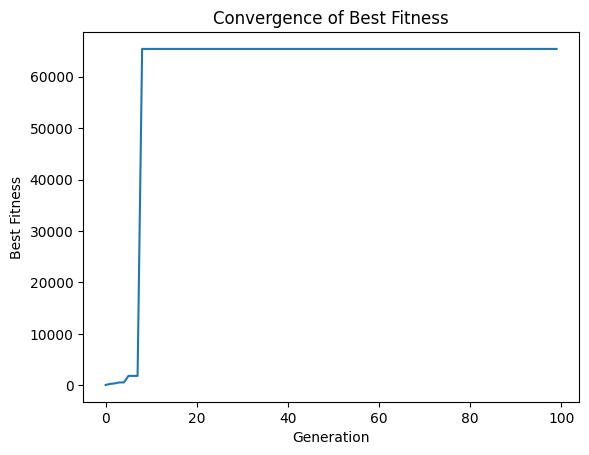


Best Solution: x = 2.9960899315738025, Fitness = 65409.220366243164


In [2]:
import numpy as np

# Função objetivo
def objective_function(x):
    return (1 / (x - 3) ** 2 + 0.1) + (1 / (x - 2) ** 2 + 0.05)

# Função para converter uma cadeia binária para um número real
def binary_to_float(binary_str, lower_bound, upper_bound):
    decimal = int(binary_str, 2)
    return lower_bound + decimal * (upper_bound - lower_bound) / (2 ** len(binary_str) - 1)

# Função para criar uma população inicial
def create_population(population_size, chromosome_length):
    return np.random.randint(2, size=(population_size, chromosome_length))

# Função para avaliar a aptidão de cada indivíduo na população
def evaluate_population(population):
    fitness_values = np.zeros(len(population))
    for i in range(len(population)):
        x = binary_to_float(''.join(map(str, population[i])), lower_bound=-5, upper_bound=5)
        fitness_values[i] = objective_function(x)
    return fitness_values

# Função de seleção de pais (roleta viciada)
def select_parents(population, fitness_values):
    probabilities = fitness_values / fitness_values.sum()
    selected_indices = np.random.choice(len(population), size=2, p=probabilities)
    return population[selected_indices]

# Função de crossover de dois pais para produzir um filho
def crossover(parent1, parent2):
    crossover_point = np.random.randint(len(parent1))
    child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    return child

# Função de mutação de um indivíduo
def mutate(individual, mutation_rate):
    mutation_points = np.random.rand(len(individual)) < mutation_rate
    individual[mutation_points] = 1 - individual[mutation_points]
    return individual

# Algoritmo genético principal
def genetic_algorithm(population_size, chromosome_length, generations, mutation_rate):
    population = create_population(population_size, chromosome_length)
    best_fitness_values = []

    for generation in range(generations):
        fitness_values = evaluate_population(population)

        # Armazenar o melhor valor de aptidão desta geração
        best_fitness = np.max(fitness_values)
        best_fitness_values.append(best_fitness)

        # Seleção dos pais
        parents = [select_parents(population, fitness_values) for _ in range(population_size // 2)]

        # Crossover
        children = [crossover(parent1, parent2) for parent1, parent2 in parents]

        # Mutação
        mutated_children = [mutate(child, mutation_rate) for child in children]

        # Substituição da população antiga pela nova
        population[:population_size // 2] = children
        population[population_size // 2:] = mutated_children

        # Imprimir o melhor valor de aptidão nesta geração
        print(f"Generation {generation + 1}, Best Fitness: {best_fitness}")
            # Plotar o gráfico de convergência
    plt.plot(best_fitness_values)
    plt.title('Convergence of Best Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.show()


    # Retornar o melhor indivíduo da última geração
    best_individual = population[np.argmax(fitness_values)]
    best_x = binary_to_float(''.join(map(str, best_individual)), lower_bound=-5, upper_bound=5)
    print(f"\nBest Solution: x = {best_x}, Fitness = {objective_function(best_x)}")

# Parâmetros do algoritmo genético
population_size = 50
chromosome_length = 10
generations = 100
mutation_rate = 0.01
# Executar o algoritmo genético
genetic_algorithm(population_size, chromosome_length, generations, mutation_rate)



Generation 1, Best Fitness: 0.9450482604051604
Generation 2, Best Fitness: 0.9618664662816616
Generation 3, Best Fitness: 0.9789381405107016
Generation 4, Best Fitness: 0.9553433149195248
Generation 5, Best Fitness: 0.9645944080706979
Generation 6, Best Fitness: 0.9937459136827456
Generation 7, Best Fitness: 0.9691895489292
Generation 8, Best Fitness: 0.980628567953584
Generation 9, Best Fitness: 0.9791061139179029
Generation 10, Best Fitness: 0.9714084444814817
Generation 11, Best Fitness: 0.9787061068768391
Generation 12, Best Fitness: 0.9532960687308394
Generation 13, Best Fitness: 0.985809771646635
Generation 14, Best Fitness: 0.9964333307894523
Generation 15, Best Fitness: 0.9949773271867343
Generation 16, Best Fitness: 0.9912783334234698
Generation 17, Best Fitness: 0.962690489404354
Generation 18, Best Fitness: 0.9693698737508806
Generation 19, Best Fitness: 0.9986901766482212
Generation 20, Best Fitness: 0.9798059042812322
Generation 21, Best Fitness: 0.9623431752932258
Generat

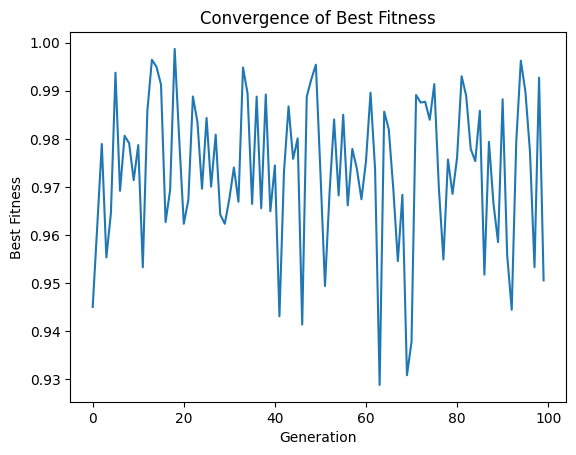

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Função objetivo
def objective_function(x, y):
    return 0.5 - (math.sin(math.sqrt(x**2 + y**2)) - 0.5) / (1 + 0.001 * (x**2 + y**2))

# Estratégia Evolutiva Principal
def evolutionary_strategy(mu, lambda_, generations, mutation_rate, sigma):
    best_solution = None
    best_fitness = float('-inf')
    fitness_history = []

    for generation in range(generations):
        offspring = np.random.normal(0, sigma, (lambda_, 2))

        # Avaliar a aptidão dos descendentes
        fitness_values = [objective_function(x, y) for x, y in offspring]

        # Seleção dos melhores mu indivíduos
        selected_indices = np.argsort(fitness_values)[-mu:]
        selected_offspring = offspring[selected_indices]

        # Atualizar a melhor solução
        best_index = selected_indices[np.argmax(np.array(fitness_values)[selected_indices])]
        best_solution = offspring[best_index]
        best_fitness = fitness_values[best_index]

        # Armazenar o melhor valor de aptidão desta geração
        fitness_history.append(best_fitness)

        # Imprimir o melhor valor de aptidão nesta geração
        print(f"Generation {generation + 1}, Best Fitness: {best_fitness}")

    # Imprimir a melhor solução encontrada
    print(f"\nBest Solution: (x, y) = {best_solution}, Fitness = {best_fitness}")

    # Plotar o gráfico de convergência
    plt.plot(fitness_history)
    plt.title('Convergence of Best Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.show()

# Parâmetros da estratégia evolutiva
mu = 5          # Tamanho da população principal
lambda_ = 20    # Tamanho da população de descendentes
generations = 100
mutation_rate = 0.1
sigma = 0.1      # Desvio padrão para a mutação normal

# Executar a estratégia evolutiva
evolutionary_strategy(mu, lambda_, generations, mutation_rate, sigma)
